In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Downloading our best model that was picked up by Model-Checkpoint
best_model = tf.keras.models.load_model('final_model.h5')

In [3]:
# Funtion to read image and transform image to tensor 
def load_and_prep_image(filename, img_shape = 300):
    img = tf.io.read_file(filename) #read image
    img = tf.image.decode_image(img) # decode the image to a tensor
    img = tf.image.resize(img, size = [img_shape, img_shape]) # resize the image
    return img

In [4]:
# Funtion to read image and give desired output with image
def pred_and_plot(model, filename, class_names):
    """
    Imports an image located at filename, makes a prediction on it with
    a trained model and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)
    
    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    
    if len(pred[0]) > 1: # check for multi-class
        pred_class = class_names[pred.argmax()] # if more than one output, take the max
    else:
        pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

    # Plot the image and predicted class
    sh_image = plt.imread(filename)
    plt.imshow(sh_image)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

In [5]:
# predefining class names so not to confuse with the output
class_names = ['Not-fire','Fire']

## Sample 1

1/1 [==============================] - 2s 2s/step


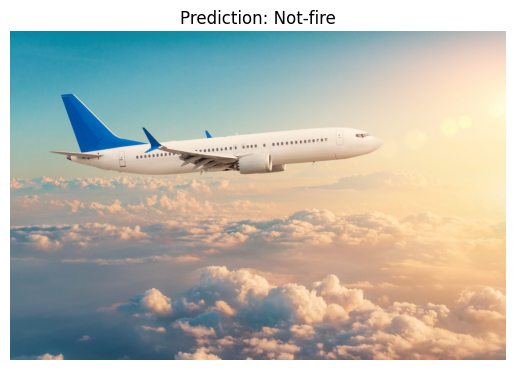

In [6]:
# specifying path to sample image from list of test images.
sample_img = 'test\AdobeStock_249454423-scaled.jpeg'

# reading the input and checking the output
pred_and_plot(best_model, sample_img, class_names)

## Sample 2

1/1 [==============================] - 0s 175ms/step


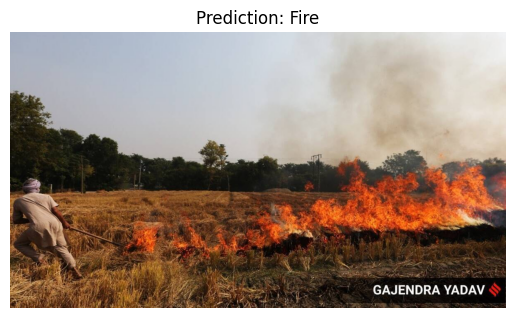

In [7]:
# specifying path to sample image from list of test images.
sample_img = 'test\Stubble-burning-1-1-1.jpg'

# reading the input and checking the output
pred_and_plot(best_model, sample_img, class_names)

## Sample 3

1/1 [==============================] - 0s 173ms/step


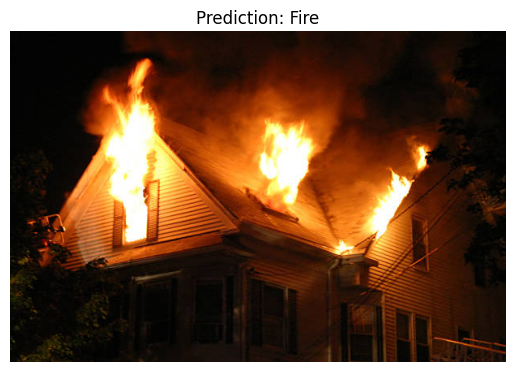

In [8]:
# specifying path to sample image from list of test images.
sample_img = 'test\istockphoto-172202319-612x612.jpg'

# reading the input and checking the output
pred_and_plot(best_model, sample_img, class_names)